# Perform Clustering(DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving crime_data.csv to crime_data.csv


In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
%matplotlib inline

In [4]:
df=pd.read_csv("crime_data.csv")
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


# EDA

In [5]:
# Display the first few rows of the dataset
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
# Summary statistics of the numerical columns
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [8]:
df.shape

(50, 5)

In [9]:
#finding duplicates
df.duplicated().sum()

0

In [10]:
#finding missing values
df.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

#Analysing data

<ipython-input-11-18e44243af95>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Text(0.5, 1.0, 'Correlation Heatmap')

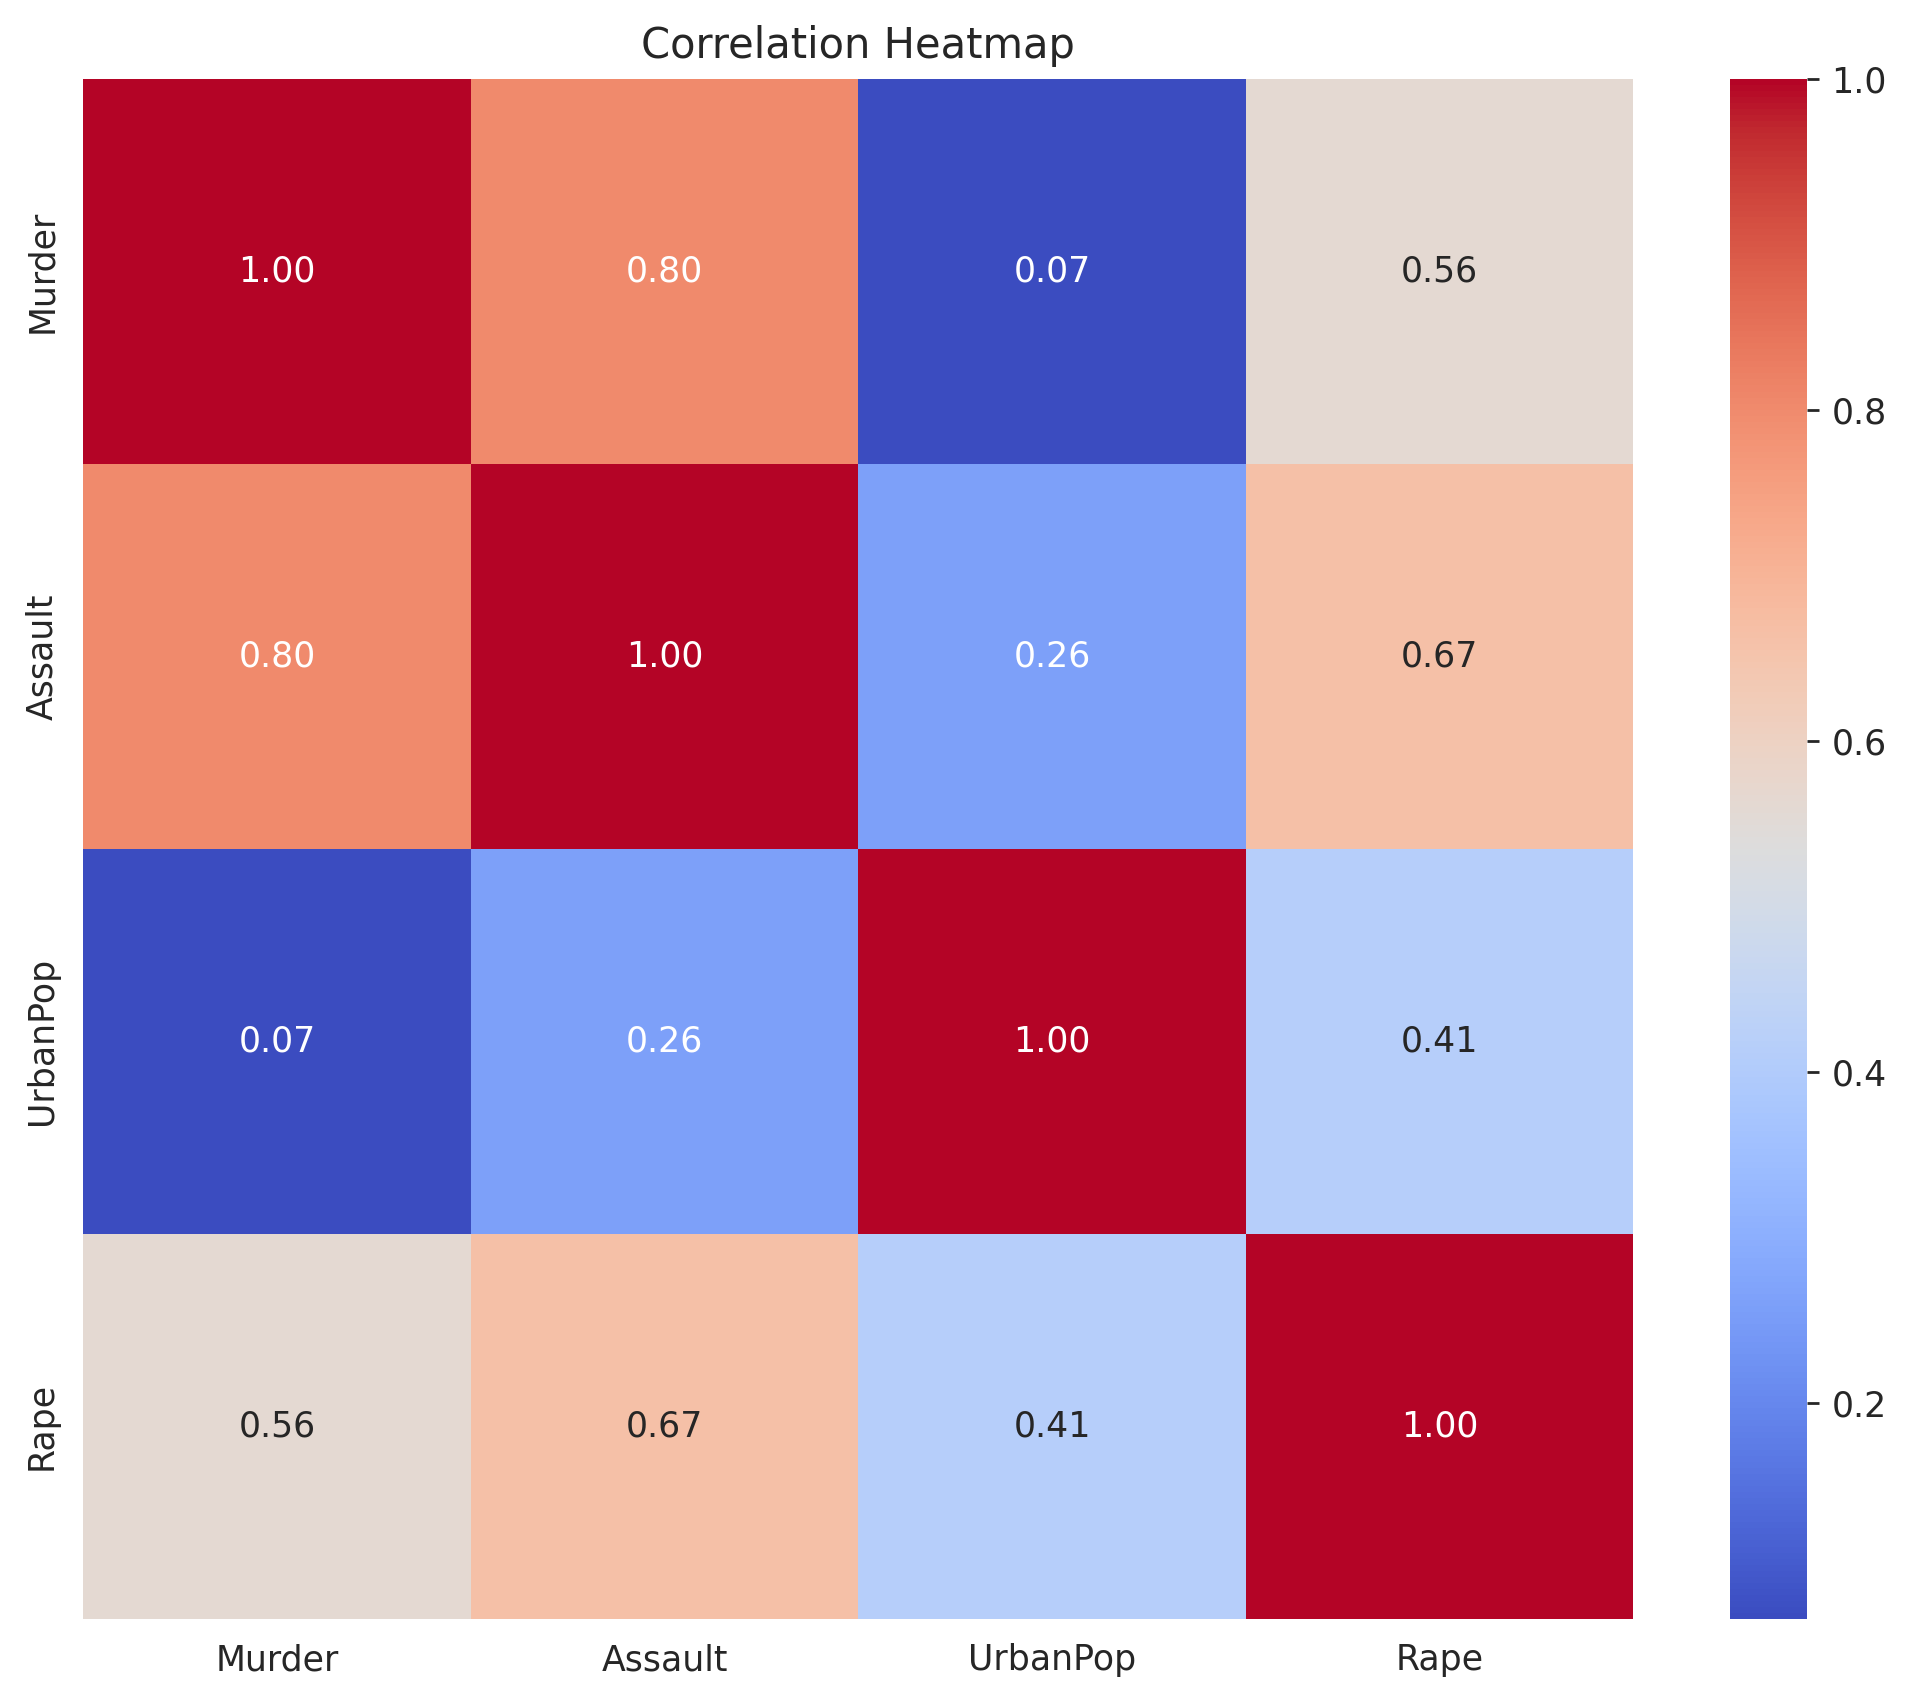

In [11]:
# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")

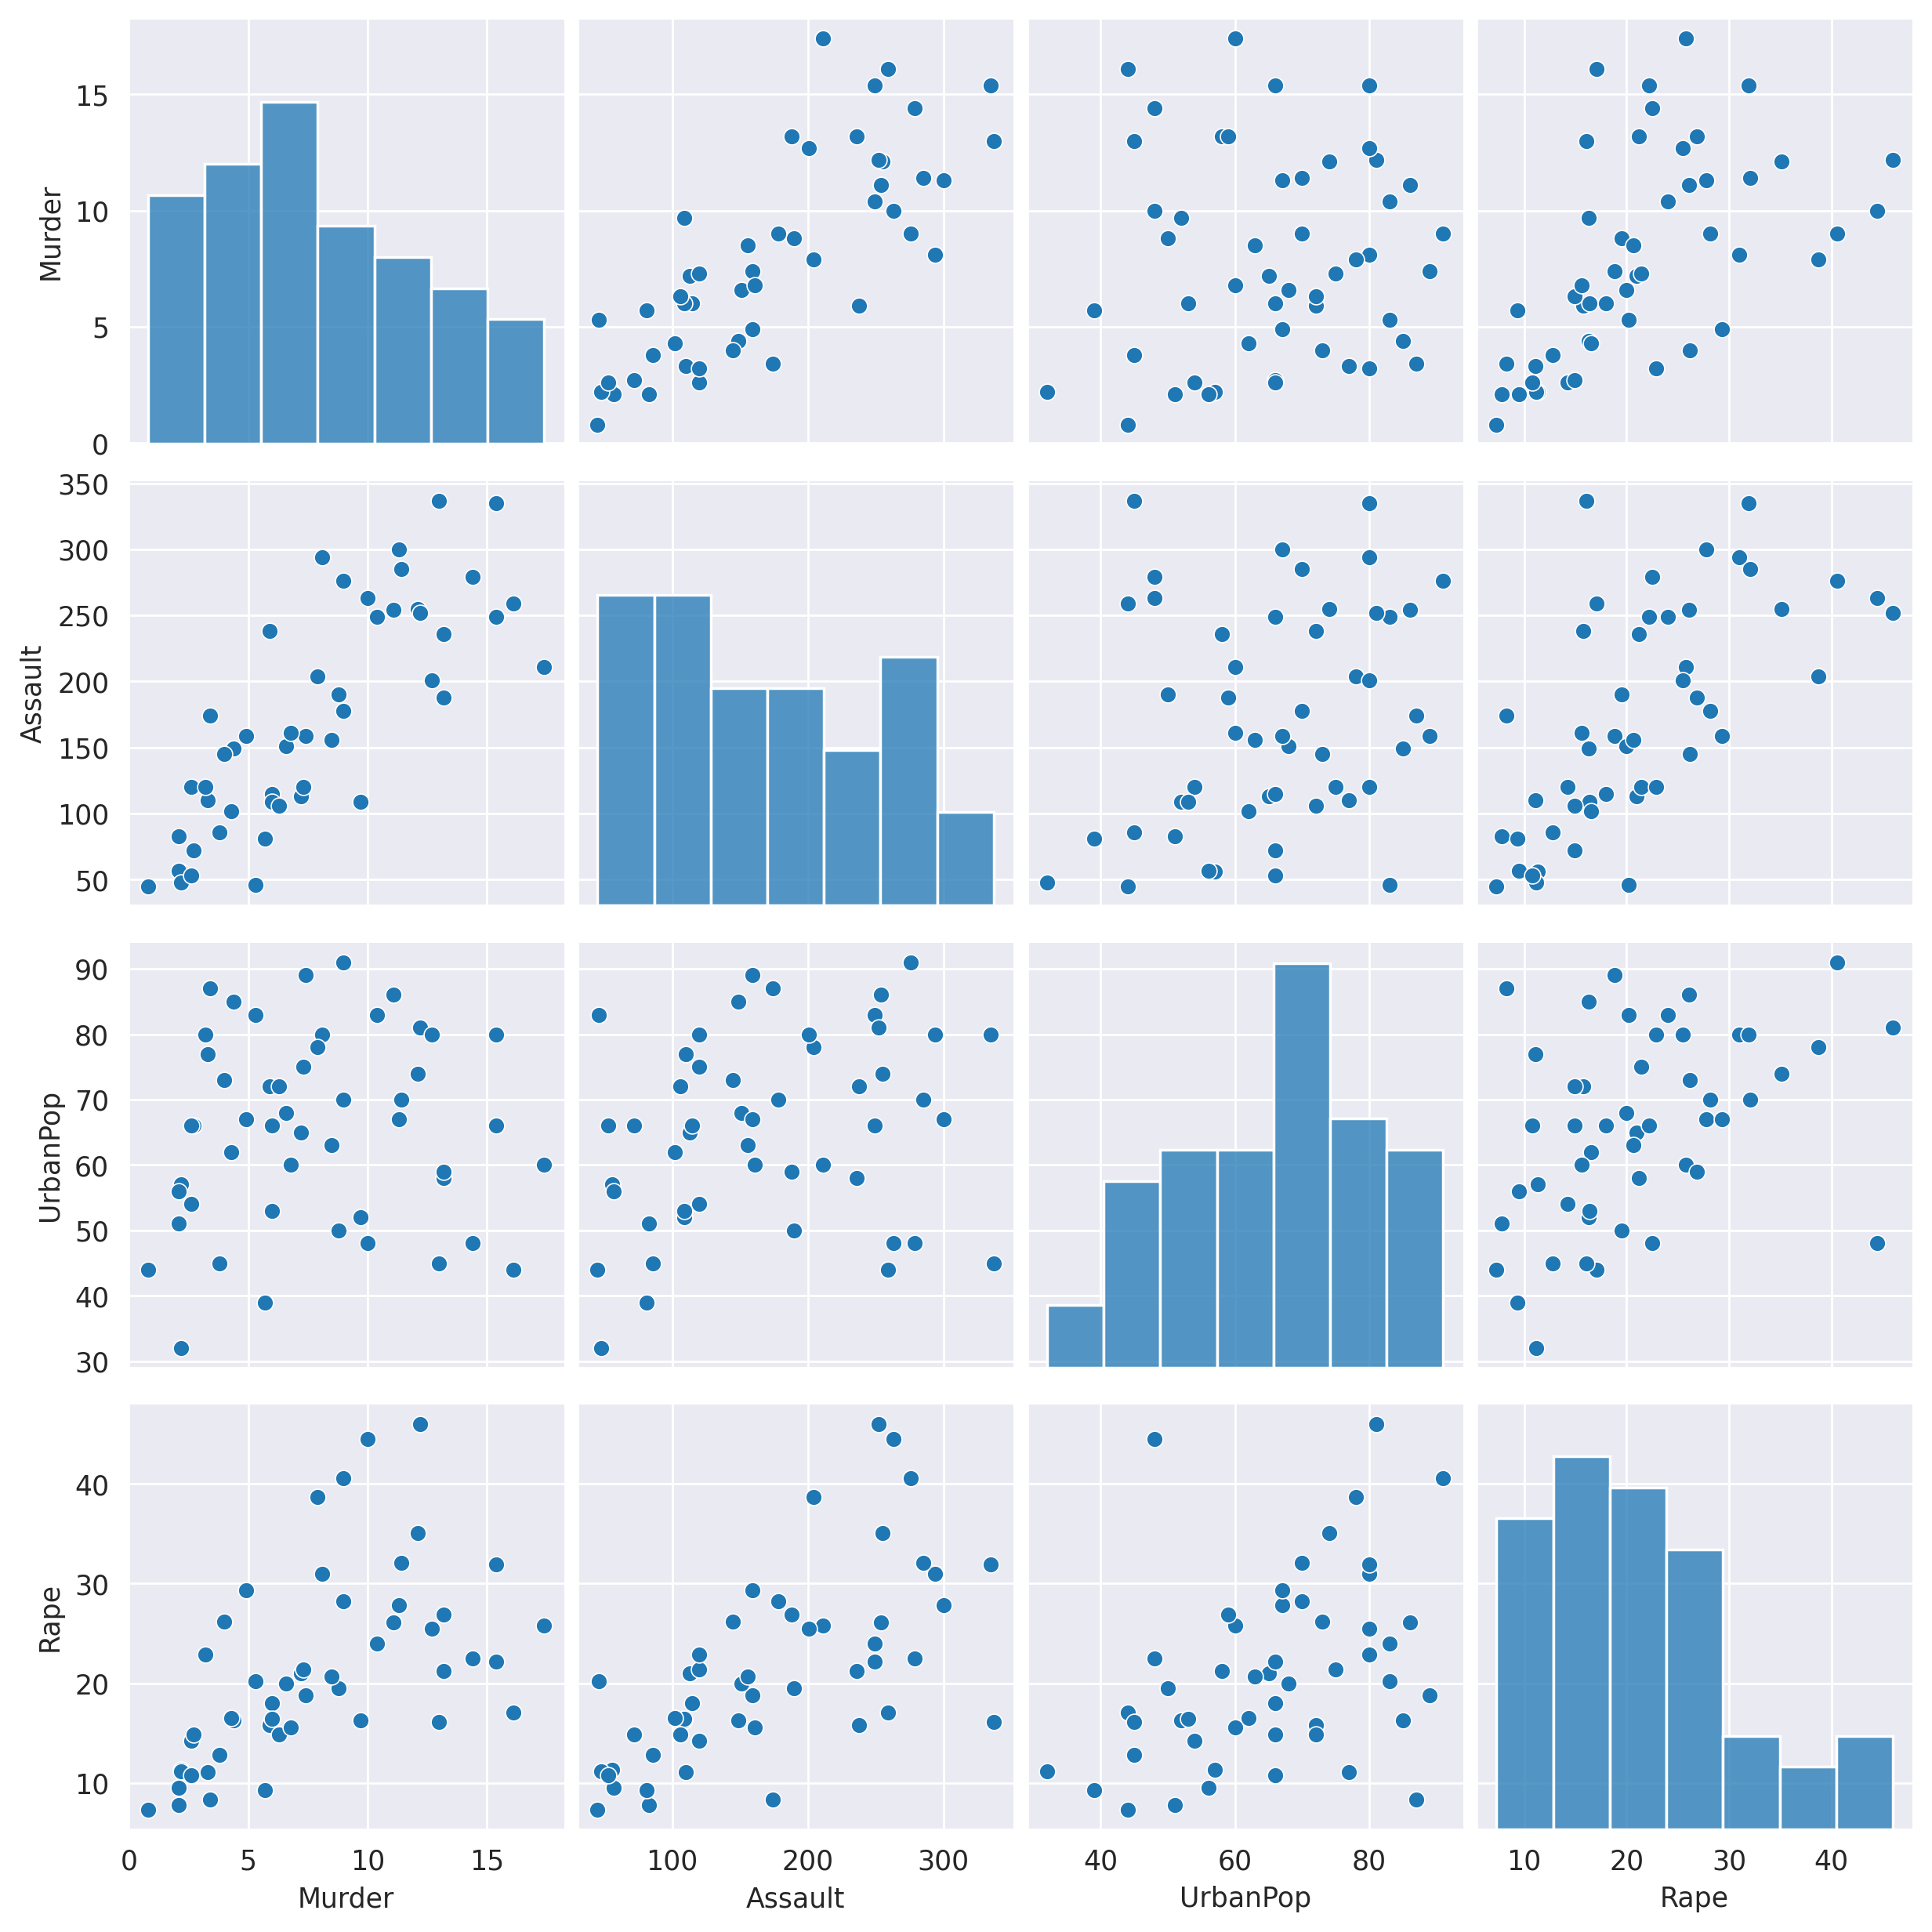

In [12]:
sns.pairplot(df)

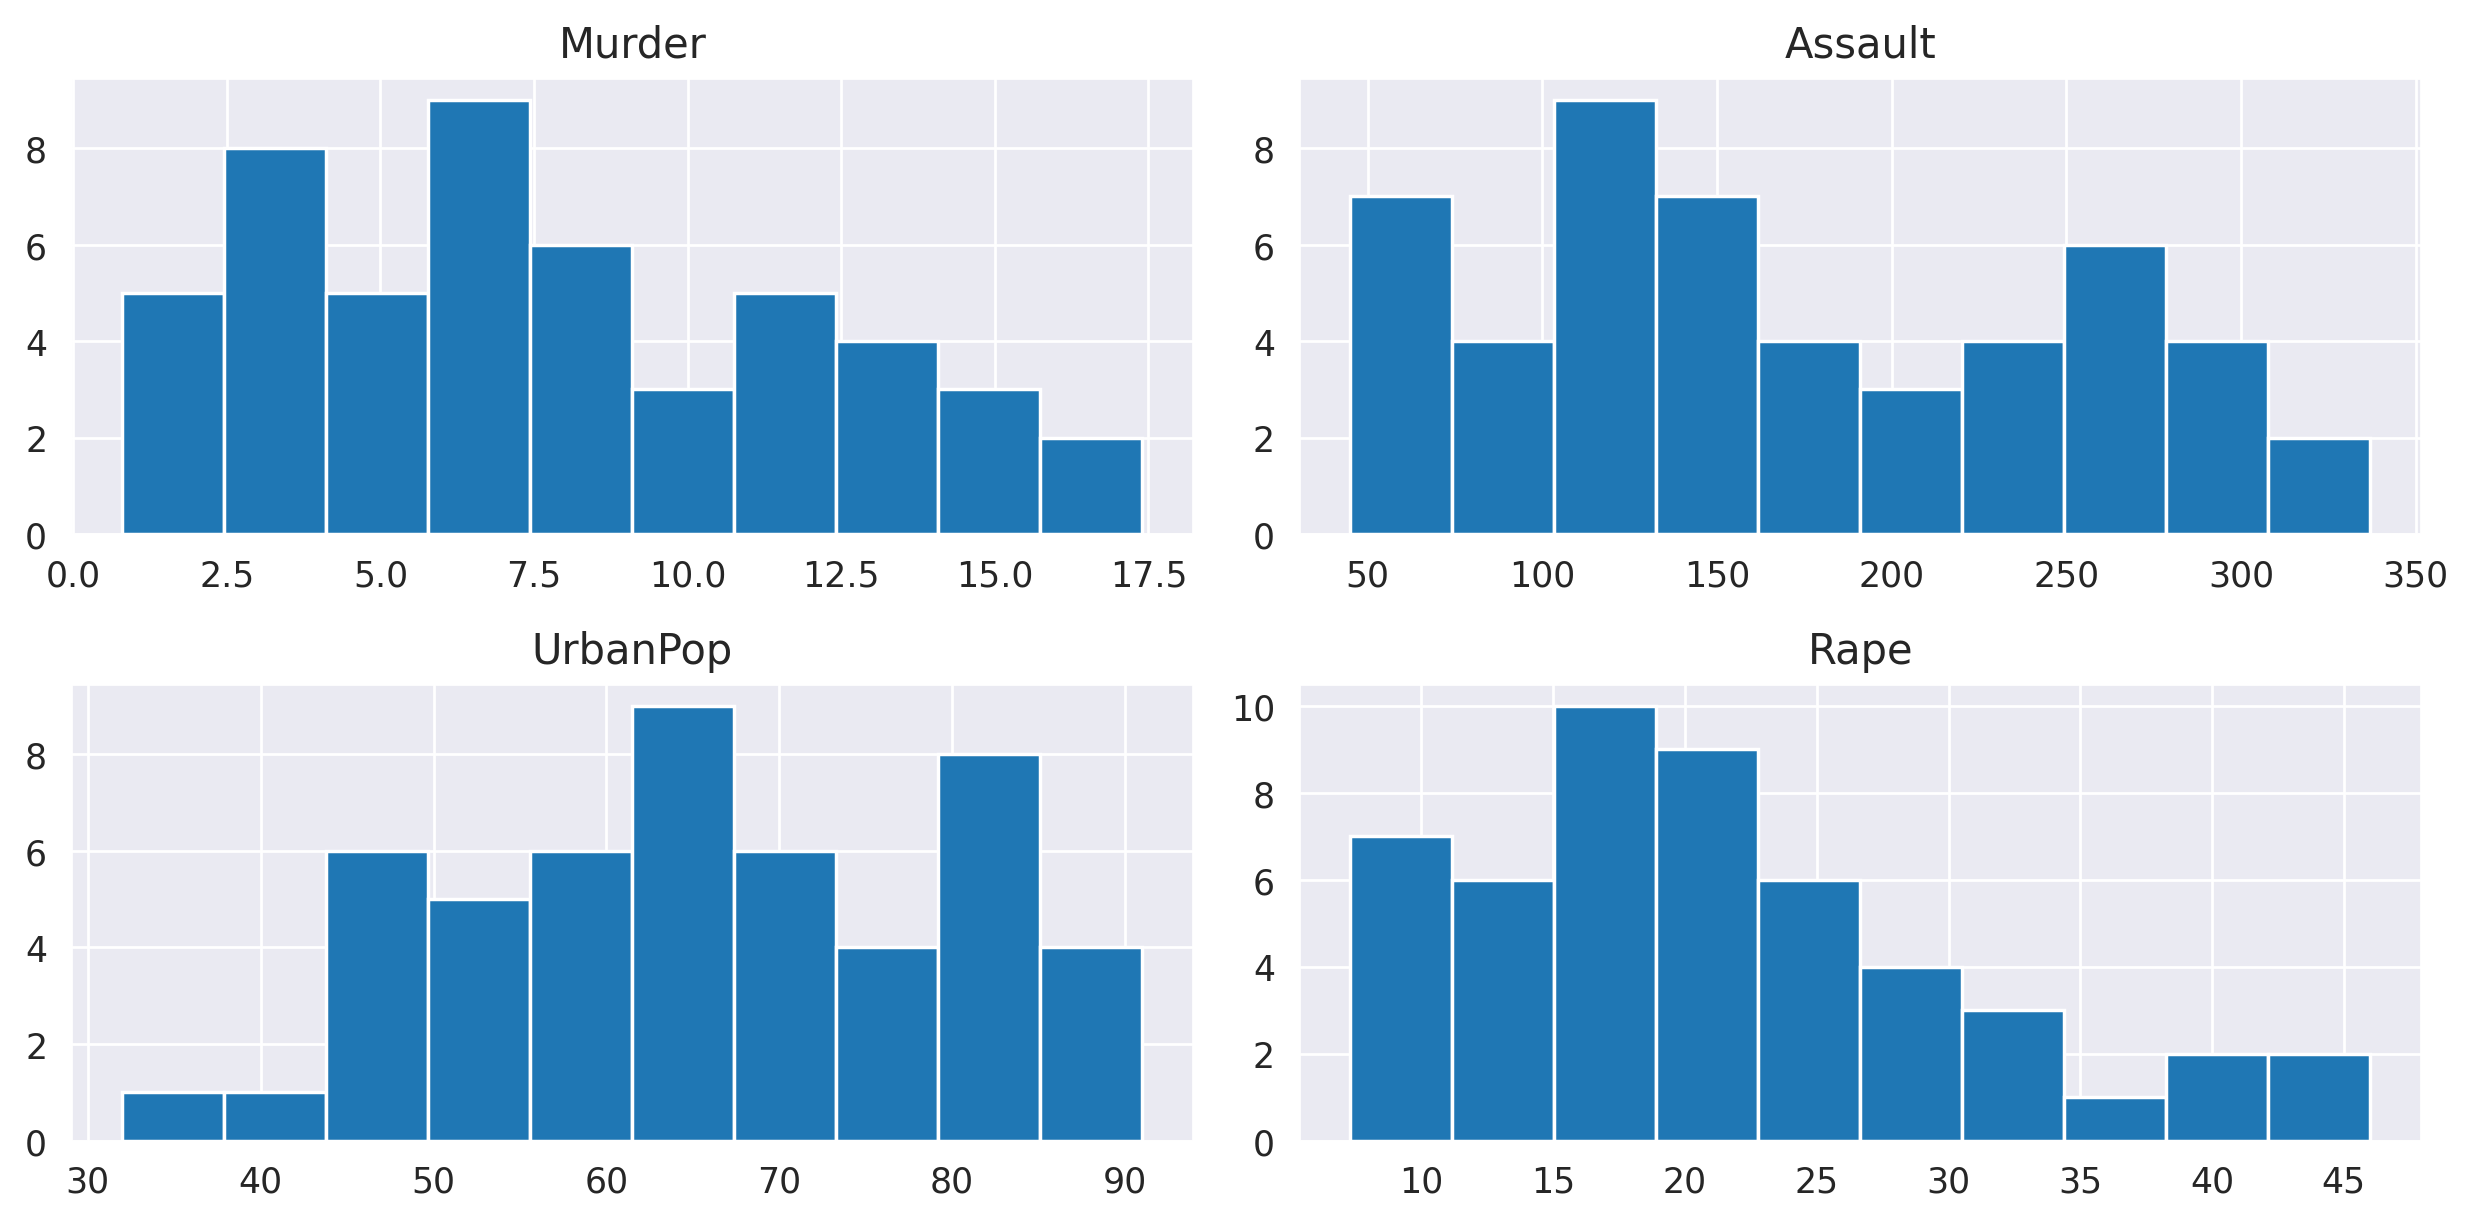

In [13]:
df.hist()
plt.tight_layout()

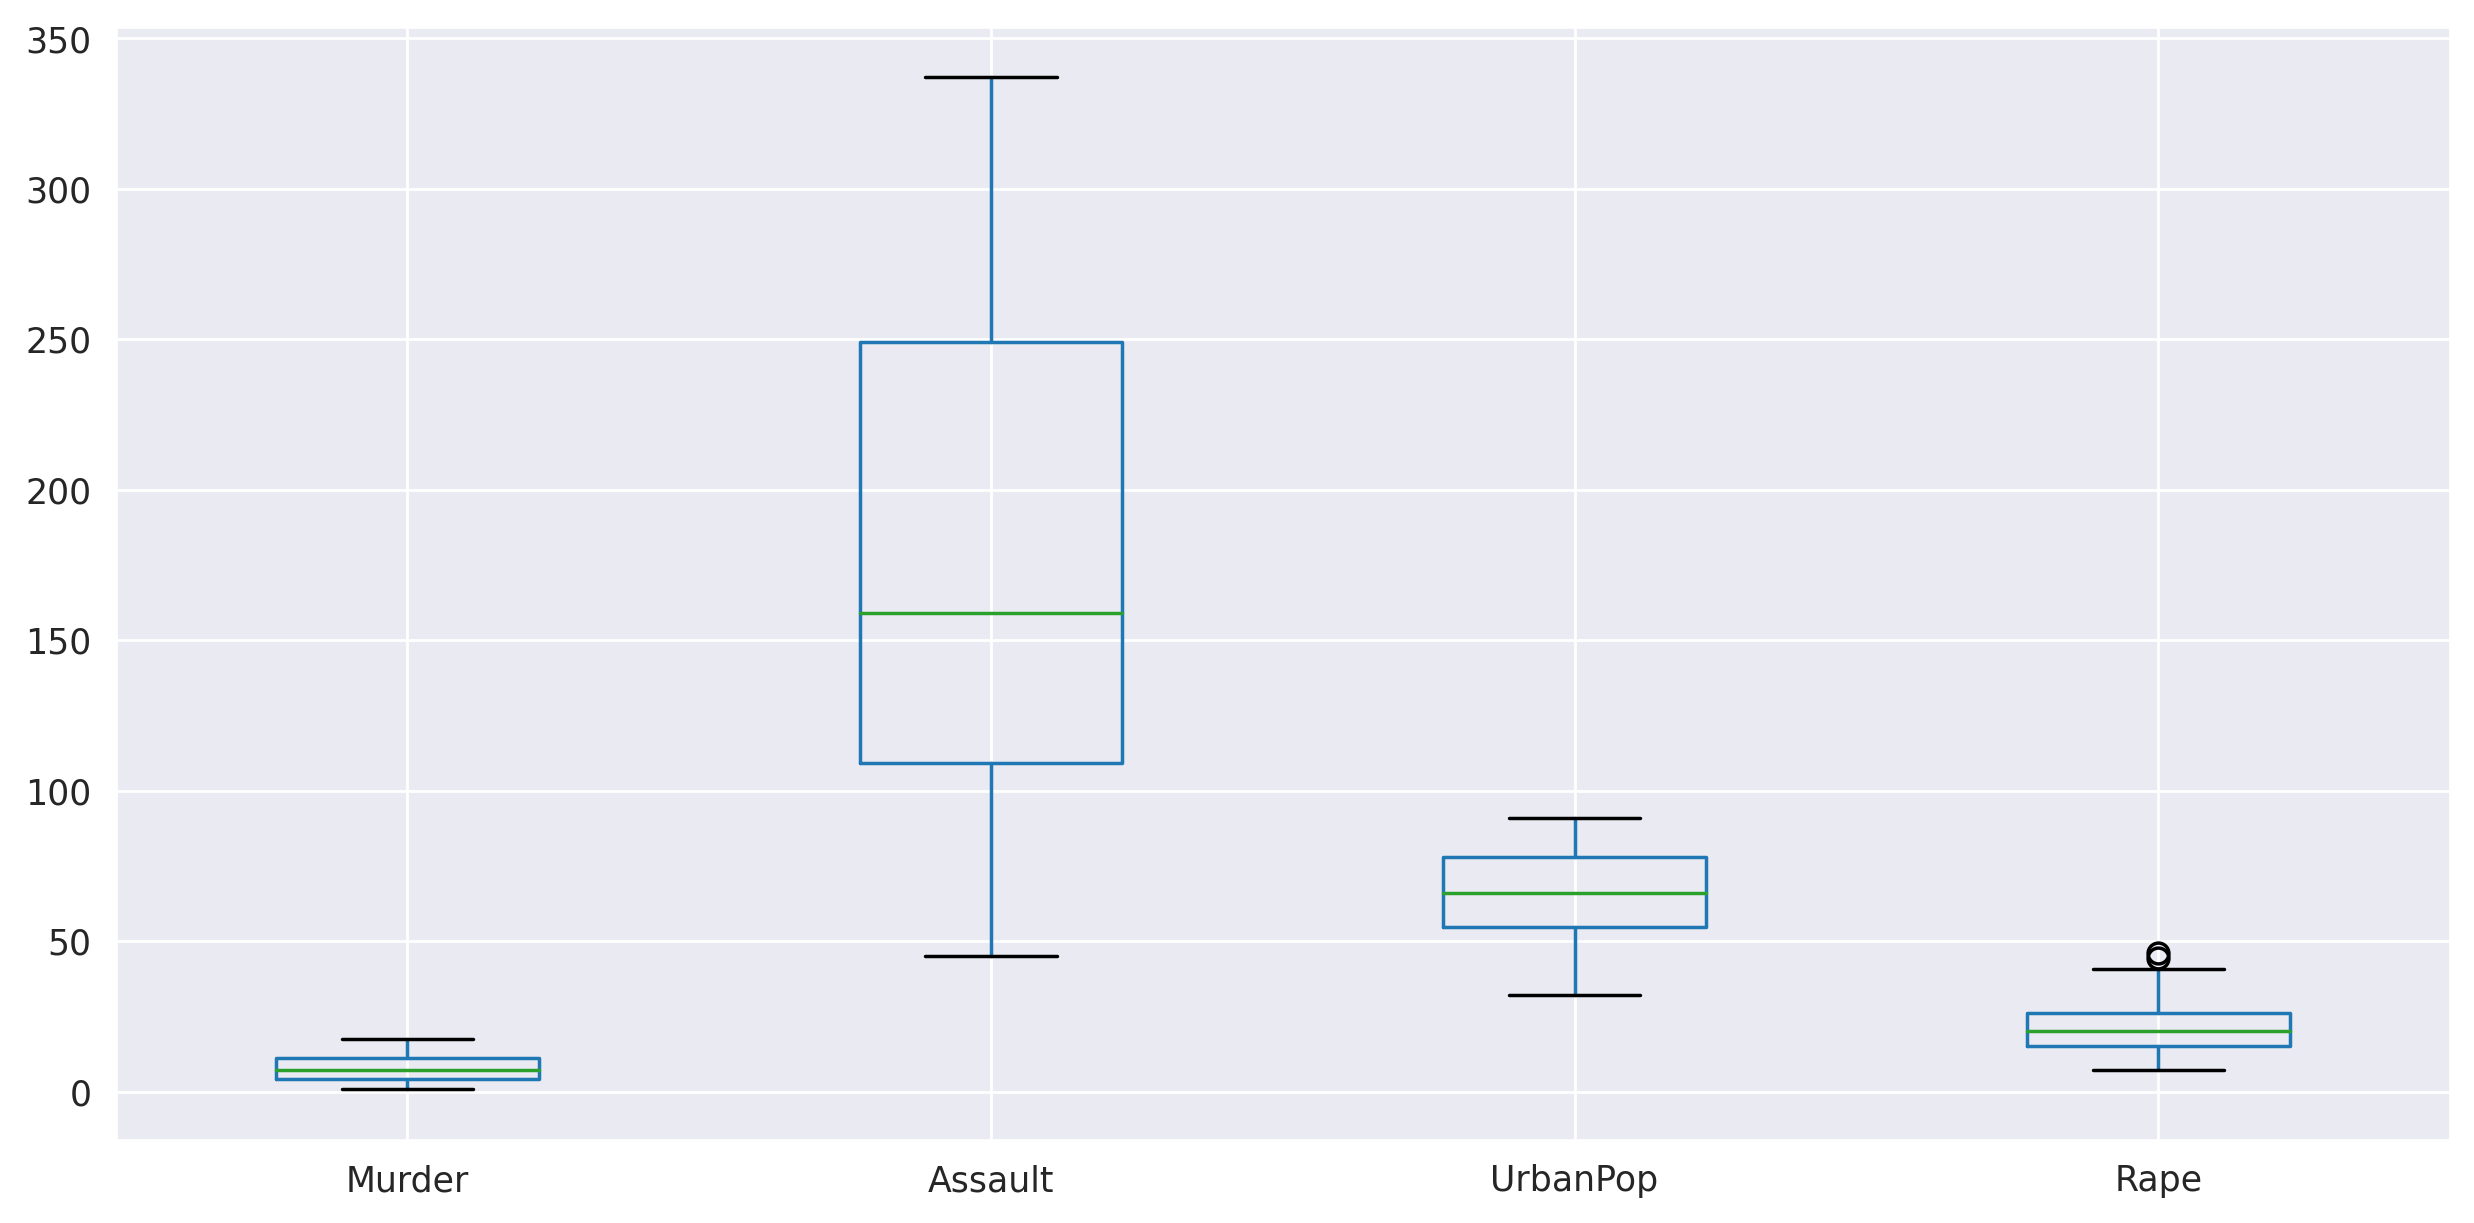

In [14]:
df.boxplot()
plt.tight_layout()

#DBSCAN

In [17]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.200
1,10.0,263,48,42.825
2,8.1,294,80,31.000
3,8.8,190,50,19.500
4,9.0,276,91,40.600
5,7.9,204,78,38.700
6,3.3,110,77,11.100
7,5.9,238,72,15.800
8,15.4,335,80,31.900
9,17.4,211,60,25.800


In [18]:
#Feature scaling
from sklearn.preprocessing import StandardScaler

In [19]:
sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[ 1.25517927,  0.79078716, -0.52619514,  0.00719922],
       [ 0.51301858,  1.11805959, -1.22406668,  2.40232482],
       [ 0.07236067,  1.49381682,  1.00912225,  1.0926203 ],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18108811],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.15588993],
       [ 0.02597562,  0.40290872,  0.86954794,  1.94545115],
       [-1.04088037, -0.73648418,  0.79976079, -1.11144904],
       [-0.43787481,  0.81502956,  0.45082502, -0.59088995],
       [ 1.76541475,  1.99078607,  1.00912225,  1.19230183],
       [ 2.22926518,  0.48775713, -0.38662083,  0.51668259],
       [-0.57702994, -1.51224105,  1.21848371, -0.10355803],
       [-1.20322802, -0.61527217, -0.80534376, -0.76810155],
       [ 0.60578867,  0.94836277,  1.21848371,  0.31731953],
       [-0.13637203, -0.70012057, -0.03768506, -0.01495223],
       [-1.29599811, -1.39102904, -0.5959823 , -1.08929758],
       [-0.41468229, -0.67587817,  0.03210209, -0.34722399],
       [ 0.44344101, -0.

# Model Building

In [20]:
from sklearn.cluster import DBSCAN

In [21]:
db = DBSCAN(eps=0.5, min_samples=3)

y = db.fit_predict(x)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

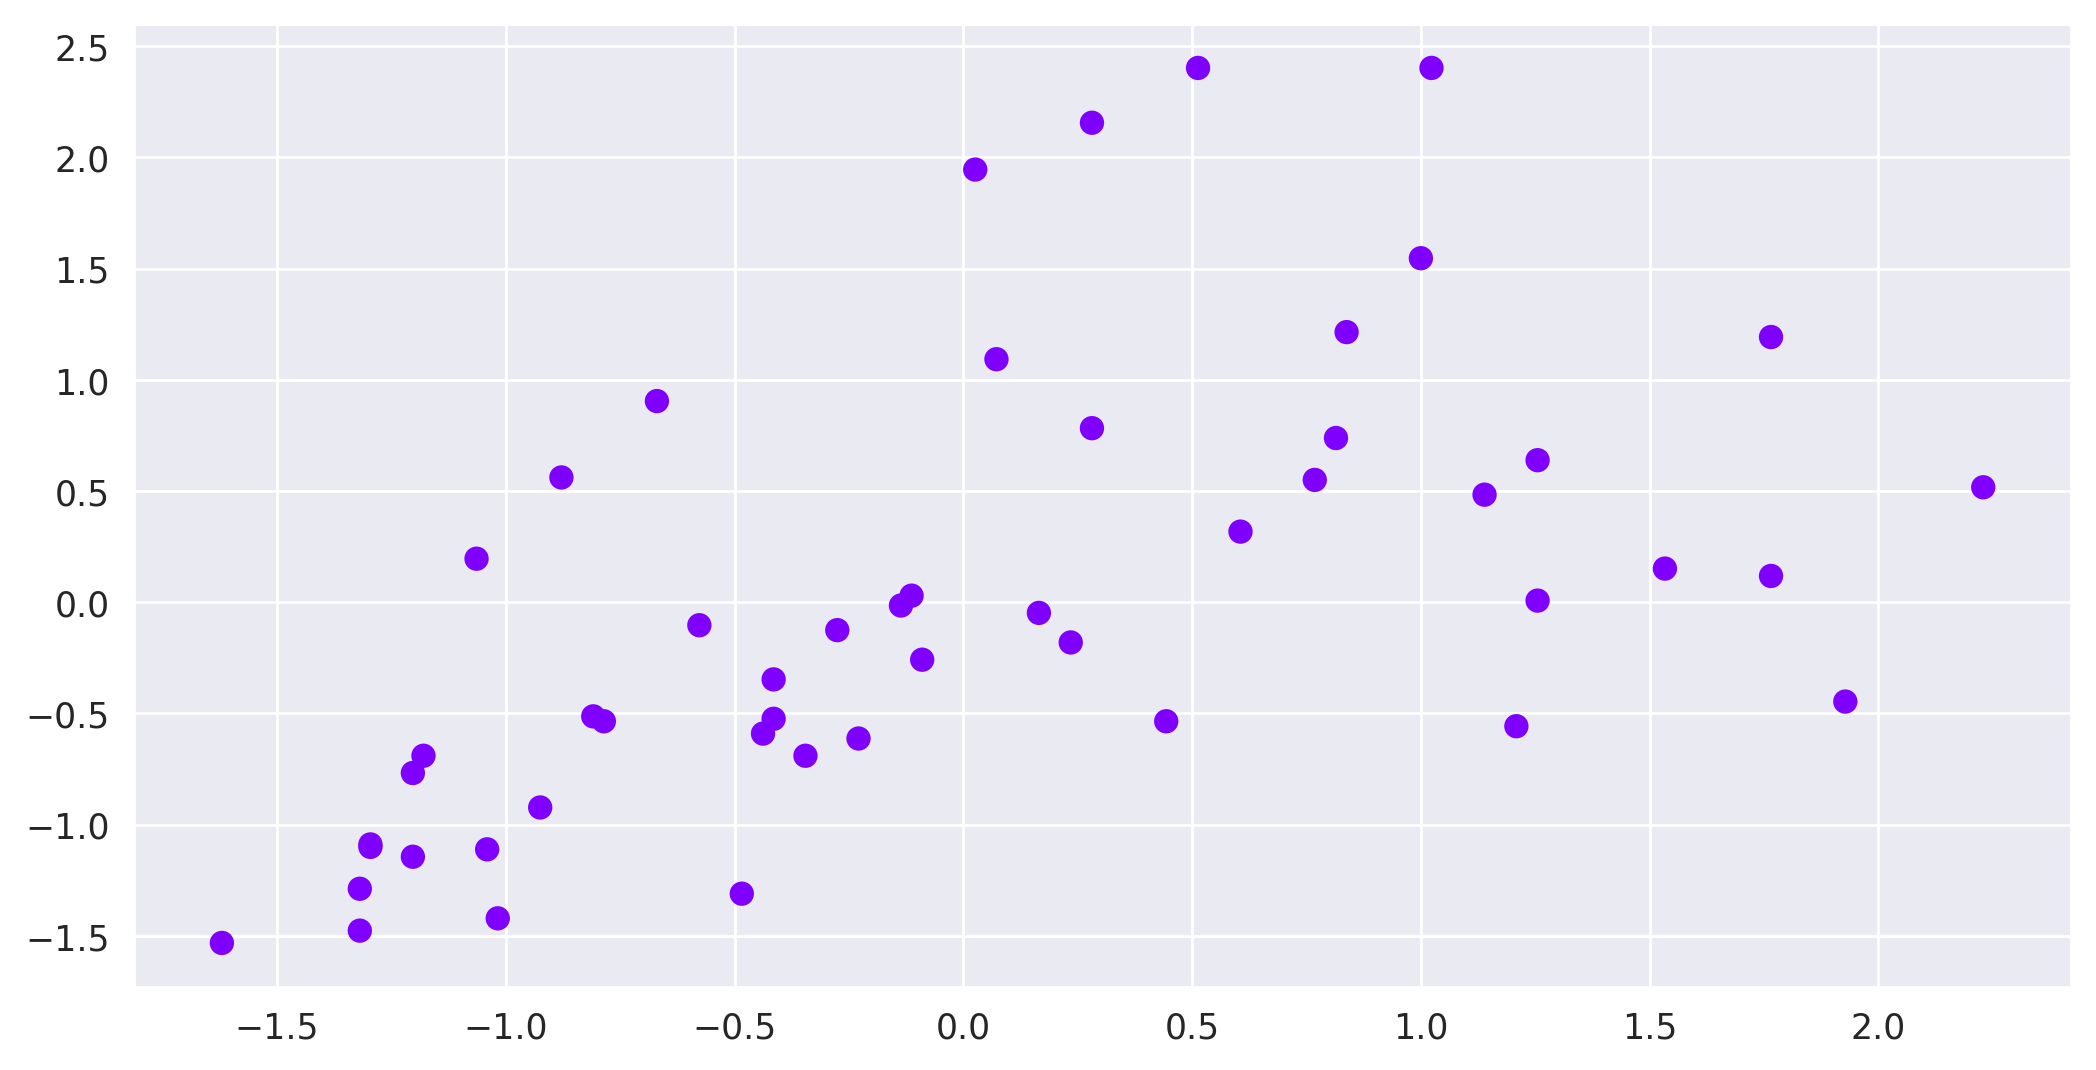

In [23]:
plt.scatter(x[:,0],x[:,3],c = y,cmap = 'rainbow')

In [40]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import numpy as np

# Generate some example data
np.random.seed(42)
X = np.random.rand(100, 2)

# Fit a clustering algorithm (e.g., KMeans)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Calculate silhouette score
score = silhouette_score(X, labels)
print(f"Silhouette Score: {score}")


Silhouette Score: 0.42967869588128577


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
